# Convolutional Neural Network, MNIST DEMO

> 본 데모는 CNN을 쉽게 돌려볼 수 있는 교육용 자료로서, 김인식(insik92@gmail.com)에 의해 작성되었습니다.


MNIST는 손으로 쓴 숫자가 있는 이미지 데이터셋입니다.

Convolutional Neural Network (이하, CNN)은 Neural Network의 한 종류입니다.

CNN model을 이용하여 손글씨 숫자를 분류하는 분류기를 만들어 봅니다.

자세한 설명은 다음 블로그를 참고해보세요. 

> (Part 4) Keras 설치 & MNIST 예제 실행
> http://blog.daum.net/goodgodgd/22


## 준비사항
본 DEMO를 실행시켜보기 위해서는 아래의 준비사항들을 모두 완료해야 합니다. 각각에 대해 잘 모르겠으면 순서대로 진행해주시면 됩니다.

* python2
> 간편설치를 위해, anaconda python을 설치하세요. https://www.continuum.io/downloads

* g++ compiler
> MinGW를 설치하세요. anaconda python을 설치했다면 cmd를 키고 다음 명령을 실행합니다. "conda install mingw libpython"
>
> MinGW의 경로를 시스템 환경변수에 추가하세요. 예) C:\Users\USERNAME\Anaconda2\MinGW
>
> USERNAME에 윈도우 사용자 이름을 입력하세요. 
> 
> 주의: 아나콘다를 쓰지 않고 직접 설치할 때 64bit윈도우에는 MinGW64를 설치해야 합니다.

* python theano package
> https://github.com/Theano/Theano 에 들어가 Download Zip 클릭
>
> 압축 풀고 해당 디렉토리에 들어가 cmd를 키고 python setup.py develop 명령을 실행
>
> 자세한 사항은 http://deeplearning.net/software/theano/install.html#bleeding-edge-install-instructions 참고

* python keras package
> cmd를 열고 pip install keras 명령을 실행

* 혹시 다른 python package가 필요한 경우 다음 명령을 실행하세요
> pip install PACKAGENAME
>
> 예) pip install pandas
> 
> 예2) pip install h5py

* 또 다른 설치 참고 링크: http://stackoverflow.com/questions/34097988/how-to-install-keras-and-theano-in-anaconda-python-2-7-in-windows

## MNIST DATA Download

MNIST 데이터는 파이썬 라이브러리를 통해 쉽게 다운받을 수 있습니다. 아래는 다운로드 받는 코드입니다. 

코드블락을 실행시켜보세요 (단축기 Ctrl+Enter)

In [3]:
from keras.datasets import mnist # keras package는 유명한 dataset들을 편리하게 사용할 수 있는 기능을 제공합니다.
from keras.utils import np_utils

# MNIST 데이터 불러와서 CNN input 규격에 맞게 변형

# 다음 라인을 처음 실행하면 minst dataset을 다운로드합니다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# MNIST dataset은 28x28 사이즈의 흑백 이미지이며, 0~9까지 10종류의 이미지들을 포함합니다.
img_rows, img_cols = 28, 28
nb_classes = 10

X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

('X_train shape:', (60000L, 1L, 28L, 28L))
(60000L, 'train samples')
(10000L, 'test samples')


## (Optional) MNIST DATA 구경하기

MNIST DATA가 어떻게 구성되었는지 보려면 다음의 코드블락을 실행시켜보세요

answer [5]
answer [0]
answer [4]


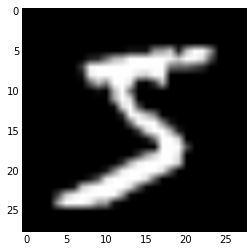

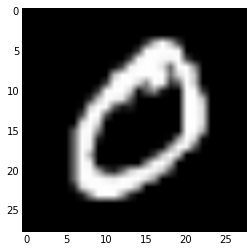

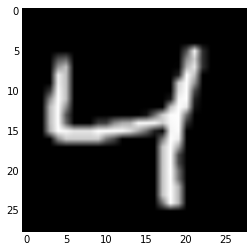

In [2]:
%matplotlib inline

from IPython.display import Image 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import numpy as np

for idx in range(0,3):
    print 'answer', np.where(Y_train[idx]==1.0)[0]
    plt.figure()
    plt.imshow(X_train[idx].reshape(28,28), cmap=cm.Greys_r)

## CNN Model 만들기

CNN은 여러개의 레이어로 구성되어 있습니다. 
레이어 하나 하나를 어떻게 구성할지 keras package를 이용해 지정할 수 있습니다.

In [4]:
# Author: Hussein Al-barazanchi
# reading and saving the data are based on the code
# from the following link 
# http://www.kaggle.com/users/9028/danb/digit-recognizer/convolutional-nn-in-python

# import numpy and pandas for array manipulationa and csv files
import numpy as np
import pandas as pd


# import keras necessary classes
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD

# Creating the model which consists of 3 conv layers followed by
# 2 fully conntected layers
print 'creating the model'

# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

model = Sequential()

model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(1, img_rows, img_cols)))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adadelta')

creating the model


## CNN Model 훈련 시키기

CNN Model도 만들었고, MNIST 데이터도 준비되었으면 훈련을 시작합니다.

CNN Model은 정답이 있는 데이터를 이용해 지도학습으로 훈련합니다.

CPU 사양에 따라 훈련 시간이 꽤 오래 (10분 이상~ 몇 시간) 걸릴 수 있습니다. GPU를 이용하면 980Ti기준 1분 정도에 모든 계산을 끝냅니다.

In [5]:
# 한번 이 코드를 돌려보세요. 너무 오래 걸린다면, 다음의 코드 블락을 살펴보고 GPU를 이용하면 얼마나 빠른지 눈으로 확인하세요
batch_size = 128
nb_epoch = 12

model.fit(X_train, Y_train, nb_epoch=nb_epoch, batch_size=batch_size, validation_split=0.1, show_accuracy=True)

Train on 54000 samples, validate on 6000 samples
Epoch 1/12
  384/54000 [..............................] - ETA: 868s - loss: 2.2124 - acc: 0.1589

KeyboardInterrupt: 

In [3]:
# 이 블락은 실행하지 마세요!
# Use GPU 980Ti. 이 코드블락은 GPU를 사용했을 때 속도를 보여주기 위한 샘플입니다. 

batch_size = 128
nb_epoch = 12

model.fit(X_train, Y_train, nb_epoch=nb_epoch, batch_size=batch_size, validation_split=0.1, show_accuracy=True)

Train on 54000 samples, validate on 6000 samples
Epoch 1/12
54000/54000 [==============================] - 4s - loss: 0.2557 - acc: 0.9210 - val_loss: 0.0553 - val_acc: 0.9847
Epoch 2/12
54000/54000 [==============================] - 4s - loss: 0.0954 - acc: 0.9724 - val_loss: 0.0466 - val_acc: 0.9870
Epoch 3/12
54000/54000 [==============================] - 4s - loss: 0.0722 - acc: 0.9783 - val_loss: 0.0346 - val_acc: 0.9895
Epoch 4/12
54000/54000 [==============================] - 4s - loss: 0.0575 - acc: 0.9824 - val_loss: 0.0372 - val_acc: 0.9893
Epoch 5/12
54000/54000 [==============================] - 4s - loss: 0.0490 - acc: 0.9848 - val_loss: 0.0302 - val_acc: 0.9910
Epoch 6/12
54000/54000 [==============================] - 4s - loss: 0.0456 - acc: 0.9859 - val_loss: 0.0314 - val_acc: 0.9902
Epoch 7/12
54000/54000 [==============================] - 4s - loss: 0.0403 - acc: 0.9877 - val_loss: 0.0320 - val_acc: 0.9910
Epoch 8/12
54000/54000 [==============================] - 4s -

## (Optional) Model, Weight Save & Load
모델을 만들고, 훈련시키는 작업은 시간이 오래걸립니다. 
따라서 각 단계마다 저장해 놓고 재활용하는 것이 좋습니다.


In [7]:
# 모델 저장하기
json_string = model.to_json()
open('cnn_mnist.json', 'w').write(json_string)

In [ ]:
# 훈련 결과 (Weight) 저장하기
model.save_weights('cnn_mnist.h5')

In [ ]:
# 모델 불러오기
# 여기에 버그가 발생할 수 있습니다. 그런 경우에는 모델은 직접 생성하고 훈련 결과만 불러와 사용하세요
from keras.models import model_from_json
model = model_from_json(open('cnn_mnist.json').read())

In [5]:
# 훈련결과 (Weight) 불러오기
model.load_weights('cnn_mnist.h5')

## CNN Model 성능 측정하기

MNIST 데이터 중 일부는 testset으로 구분하여 훈련에서는 사용하지 않았습니다.

testset에 있는 손글씨이미지는 CNN Model이 처음 접하는 데이터입니다. 

이 testset에 대해 얼마나 잘 분류하는지를 측정해봅시다.

In [8]:
score = model.evaluate(X_test, Y_test, show_accuracy=True, verbose=False)
print('Test score:', score[0])
print('Test accuracy:', score[1])

('Test score:', 0.049459663815009096)
('Test accuracy:', 0.99039999999999995)


In [10]:
# 아래의 코드는 예측한 값을 파일로 저장합니다.
preds = model.predict_classes(X_test, verbose=0)

def write_preds(preds, fname):
    pd.DataFrame({"ImageId": list(range(1,len(preds)+1)), "Label": preds}).to_csv(fname, index=False, header=True)

print 'Saving predictions'
write_preds(preds, "keras-mlp.csv")

Saving predictions


## 틀린 것 찾아보기
이번에 만든 분류기는 99% 이상의 정확도이지만 그래도 틀린 분류 결과가 있습니다. 왜 그런 결과가 나왔는지 직접 데이터를 보고 확인해보세요.

prediction: 5  real answer: 9
prediction: 6  real answer: 4
prediction: 8  real answer: 9
prediction: 7  real answer: 2


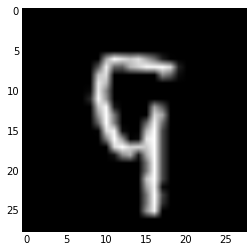

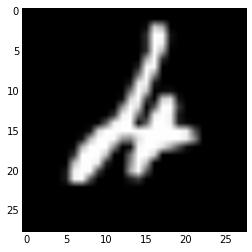

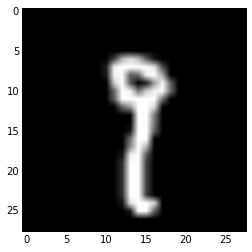

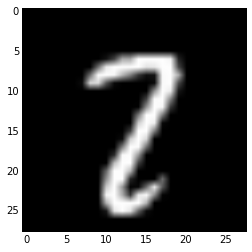

In [15]:
%matplotlib inline

from IPython.display import Image 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm

comp_result = np.equal(preds,y_test)
locs = np.where(comp_result==False)[0].tolist() # Find wrong answer positions


# 틀린 결과가 많으니 앞의 4개의 결과만 확인해 봅니다.
for idx in locs[0:4]:
    print 'prediction:', preds[idx], ' real answer:', y_test[idx]
    plt.figure()
    plt.imshow(X_test[idx].reshape(28,28), cmap=cm.Greys_r)